In [1]:
#Adds higher directory to path, so we can acess /ATS
import sys
sys.path.append("../")

from ATS.general import *
from ATS.QAQC import *

import pandas as pd

# Set the DataFram in pandas to show all columns and 1000 rows. Display plots inline
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 1000)

2021-10-29 14:11:17.216808: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-29 14:11:17.217560: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Load data and subset

<Item title:"Riparian_Tree_Census_2020_2021" type:Feature Layer Collection owner:Anooshi>
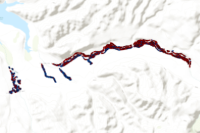

In [2]:
# Load data from arcGIS online
output = arcGIS_data_load('c2b05f4abe584e5db8c90ce8c20b9efc')

data = output['data0']
feature_service = output['feature_service']

In [3]:
### unnecessary?
# Load data from arcGIS online
#output = arcGIS_data_load('d28036c8cad54fd5b50fe8cdc03c8a3e')

#data = output['data0']
#feature_service = output['feature_service']
###

In [4]:
data.head()

,OBJECTID,Survey_Date,Surveyor_1,Surveyor_2,Zone,Habitat_Type,Tree_Species,Alive_or_Dead,GlobalID,Comments,ESRIGNSS_RECEIVER,ESRIGNSS_H_RMS,ESRIGNSS_AVG_H_RMS,Alive_Dead,SurveyYear,SHAPE
0,389,2019-04-04 06:22:00,Roger Stephens,None,NaN,Sycamore Riparian,Platanus racemosa,Dead,b2d97a0f-767c-42f6-8234-ab6932a2fe53,Missing,None,0.0,0.0,0.0,2018-2019,"{""x"": 6191076.447668061, ""y"": 2036925.16465556..."
1,390,2019-04-04 06:24:42,Roger Stephens,None,NaN,Sycamore Riparian,Platanus racemosa,Dead,6dd1eb49-25bf-4182-8f14-411871f11911,Missing,None,0.0,0.0,0.0,2018-2019,"{""x"": 6191077.316760808, ""y"": 2036938.58556047..."
2,391,2019-04-04 06:26:01,Roger Stephens,None,NaN,Sycamore Riparian,Platanus racemosa,Dead,28b7bf08-0cb6-4d91-9c6c-3a4ed015dc4b,Missing,None,0.0,0.0,0.0,2018-2019,"{""x"": 6191082.646802634, ""y"": 2036959.22036172..."
3,392,2019-04-04 06:27:04,Roger Stephens,None,NaN,Sycamore Riparian,Platanus racemosa,Dead,afc535ac-e668-4f40-b40f-5d95f2062dab,None,None,0.0,0.0,0.0,2018-2019,"{""x"": 6191080.338736385, ""y"": 2036967.95164348..."
4,393,2019-04-04 06:27:45,Roger Stephens,None,NaN,Sycamore Riparian,Platanus racemosa,Dead,8466709f-d9ef-482b-b067-e1420d740311,Missing,None,0.0,0.0,0.0,2018-2019,"{""x"": 6191059.531035215, ""y"": 2036989.56642964..."


In [5]:
# rename date column
data = data.rename(columns={'Survey_Date':'Observation_Date'})
data.head()

,OBJECTID,Observation_Date,Surveyor_1,Surveyor_2,Zone,Habitat_Type,Tree_Species,Alive_or_Dead,GlobalID,Comments,ESRIGNSS_RECEIVER,ESRIGNSS_H_RMS,ESRIGNSS_AVG_H_RMS,Alive_Dead,SurveyYear,SHAPE
0,389,2019-04-04 06:22:00,Roger Stephens,None,NaN,Sycamore Riparian,Platanus racemosa,Dead,b2d97a0f-767c-42f6-8234-ab6932a2fe53,Missing,None,0.0,0.0,0.0,2018-2019,"{""x"": 6191076.447668061, ""y"": 2036925.16465556..."
1,390,2019-04-04 06:24:42,Roger Stephens,None,NaN,Sycamore Riparian,Platanus racemosa,Dead,6dd1eb49-25bf-4182-8f14-411871f11911,Missing,None,0.0,0.0,0.0,2018-2019,"{""x"": 6191077.316760808, ""y"": 2036938.58556047..."
2,391,2019-04-04 06:26:01,Roger Stephens,None,NaN,Sycamore Riparian,Platanus racemosa,Dead,28b7bf08-0cb6-4d91-9c6c-3a4ed015dc4b,Missing,None,0.0,0.0,0.0,2018-2019,"{""x"": 6191082.646802634, ""y"": 2036959.22036172..."
3,392,2019-04-04 06:27:04,Roger Stephens,None,NaN,Sycamore Riparian,Platanus racemosa,Dead,afc535ac-e668-4f40-b40f-5d95f2062dab,None,None,0.0,0.0,0.0,2018-2019,"{""x"": 6191080.338736385, ""y"": 2036967.95164348..."
4,393,2019-04-04 06:27:45,Roger Stephens,None,NaN,Sycamore Riparian,Platanus racemosa,Dead,8466709f-d9ef-482b-b067-e1420d740311,Missing,None,0.0,0.0,0.0,2018-2019,"{""x"": 6191059.531035215, ""y"": 2036989.56642964..."


In [6]:
# Subset data for desired year.
sYear = input("Start Year? (YYYY)")
sub = year_subset(data,sYear)
sub.head()

Start Year? (YYYY) 2020

Analysis for 2020-10-01 07:00 UTC to 2021-10-01 07:00 UTC
Entries in Subset: 1918


,OBJECTID,Observation_Date,Surveyor_1,Surveyor_2,Zone,Habitat_Type,Tree_Species,Alive_or_Dead,GlobalID,Comments,ESRIGNSS_RECEIVER,ESRIGNSS_H_RMS,ESRIGNSS_AVG_H_RMS,Alive_Dead,SurveyYear,SHAPE
5520,6030,2021-06-18 07:00:00,Roger Stephens,None,NaN,,Platanus racemosa,Alive,5a2960bd-f1ae-43c5-a93f-71470cc9a3b0,Symbol Test,,0.0,0.0,NaN,2020-2021,None
5521,6031,2021-06-18 07:00:00,Roger Stephens,None,NaN,,Aesculus californica,Dead,7bfbcee8-c9b0-4fa6-8d51-dcf390863174,Symbol Test,,0.0,0.0,NaN,2020-2021,None
5522,6034,2021-06-22 16:47:01,Kurt Lutz,Brian Creeks,NaN,Sycamore Riparian,Platanus racemosa,Alive,c568218e-9ade-472d-a666-58e25a51f25b,None,None,NaN,NaN,NaN,2020-2021,"{""x"": 6191111.777040266, ""y"": 2037129.44417156..."
5523,6035,2021-06-22 16:49:56,Kurt Lutz,None,NaN,Sycamore Riparian,Platanus racemosa,Alive,481b0165-d921-4d8d-a62b-1175668786a1,None,None,NaN,NaN,NaN,2020-2021,"{""x"": 6191098.147141921, ""y"": 2037248.24407828..."
5524,6036,2021-06-22 16:55:51,Kurt Lutz,None,NaN,Sycamore Riparian,Platanus racemosa,Alive,0247c36c-9c97-46a9-855c-55d560ea63e6,None,None,NaN,NaN,NaN,2020-2021,"{""x"": 6191094.850555138, ""y"": 2037323.65338103..."


# QAQC

In [8]:
# Compare data against domains
validate_domains(feature_service)



Table/Layer:  RiparianTreeCensus_2020_2021


The following entries are not within the domain:


,Field,Data
0,Surveyor_1,"{Ryan Swanson, Janel Mayo, Richard Graham-Bruno}"
0,Surveyor_2,"{Ryan Swanson, Richard Graham-Bruno}"
0,Zone,"{nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, ...}"
0,Habitat_Type,{}


In [9]:
# Check Comments - Display entries with comments
#display(sub.loc[sub["Comments"].notnull(),:])
display(sub.loc[sub["Comments"].notnull()&(sub["Comments"]!='Missing')&(sub["Comments"]!='Missing '),:])

,OBJECTID,Observation_Date,Surveyor_1,Surveyor_2,Zone,Habitat_Type,Tree_Species,Alive_or_Dead,GlobalID,Comments,ESRIGNSS_RECEIVER,ESRIGNSS_H_RMS,ESRIGNSS_AVG_H_RMS,Alive_Dead,SurveyYear,SHAPE
5520,6030,2021-06-18 07:00:00,Roger Stephens,None,NaN,,Platanus racemosa,Alive,5a2960bd-f1ae-43c5-a93f-71470cc9a3b0,Symbol Test,,0.000000,0.000000,NaN,2020-2021,None
5521,6031,2021-06-18 07:00:00,Roger Stephens,None,NaN,,Aesculus californica,Dead,7bfbcee8-c9b0-4fa6-8d51-dcf390863174,Symbol Test,,0.000000,0.000000,NaN,2020-2021,None
5538,6050,2021-06-22 17:31:26,Kurt Lutz,None,NaN,None,Platanus racemosa,Dead,98d597f0-f897-4874-85db-e5596692b9cb,Missing.,None,NaN,NaN,NaN,2020-2021,"{""x"": 6190579.224973626, ""y"": 2037400.1457757503, ""spatialReference"": {""wkid"": 102643, ""latestWkid"": 2227}}"
5547,6059,2021-06-22 17:37:20,Kurt Lutz,None,NaN,None,Platanus racemosa,Alive,fac91260-ac69-4b93-802d-d571f5c70bec,Barely alive.,None,NaN,NaN,NaN,2020-2021,"{""x"": 6190527.133474099, ""y"": 2037437.8701955702, ""spatialReference"": {""wkid"": 102643, ""latestWkid"": 2227}}"
5589,6101,2021-06-22 18:26:46,Kurt Lutz,None,NaN,None,Platanus racemosa,Alive,98019d9e-6717-4eaa-b3ee-0488b608f674,Moribund.,None,NaN,NaN,NaN,2020-2021,"{""x"": 6189780.918765057, ""y"": 2037683.9392823053, ""spatialReference"": {""wkid"": 102643, ""latestWkid"": 2227}}"
5606,6118,2021-06-22 18:50:28,Kurt Lutz,None,NaN,None,Unknown,Dead,1ce119d2-2b29-4526-bb94-a3f746ceb768,Missing.,None,NaN,NaN,NaN,2020-2021,"{""x"": 6189419.975374828, ""y"": 2037839.7524894446, ""spatialReference"": {""wkid"": 102643, ""latestWkid"": 2227}}"
5609,6121,2021-06-22 18:52:03,Kurt Lutz,None,NaN,None,Platanus racemosa,Dead,dcf6ae29-8fdb-4da8-b630-7765595a42ef,Not previously mapped.,GNSS:84087,NaN,1.068954,NaN,2020-2021,"{""x"": 6189400.972186653, ""y"": 2037846.9279663735, ""spatialReference"": {""wkid"": 102643, ""latestWkid"": 2227}}"
5615,6127,2021-06-22 18:57:50,Kurt Lutz,None,NaN,None,Unknown,Dead,2d948b36-abfa-4277-b75a-6b2333f43152,Missing.,None,NaN,NaN,NaN,2020-2021,"{""x"": 6189244.429787594, ""y"": 2038015.9173018406, ""spatialReference"": {""wkid"": 102643, ""latestWkid"": 2227}}"
5644,6156,2021-06-22 19:33:42,Kurt Lutz,None,NaN,None,Quercus lobata,Alive,3403046e-7eaa-4c9f-ac82-f5e2eb773a44,"Was dead, regrowth.",None,NaN,NaN,NaN,2020-2021,"{""x"": 6189112.983322789, ""y"": 2038216.8276348158, ""spatialReference"": {""wkid"": 102643, ""latestWkid"": 2227}}"
5746,6258,2021-06-23 17:30:32,Kurt Lutz,None,NaN,None,Platanus racemosa,Alive,8d191902-c046-4340-8d96-a311aad868f1,"Regrowth, original tree dead.",GNSS:84087,NaN,1.243767,NaN,2020-2021,"{""x"": 6188579.381963694, ""y"": 2038036.4391431462, ""spatialReference"": {""wkid"": 102643, ""latestWkid"": 2227}}"


In [10]:
QAQC_whitespace(data, exclude_cols=['Comments'])

Name of Object ID Column:  ['OBJECTID']


Analysis for: GlobalID
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: ESRIGNSS_RECEIVER
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Alive_or_Dead
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Surveyor_1
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: SurveyYear
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Surveyor_2
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Habitat_Type
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Tree_Species
No \xa0 characters found


In [13]:
# QAQC Find blank entries in specific columns
find_blank_entries(data, exclude_cols=['Comments','ESRIGNSS_AVG_H_RMS','ESRIGNSS_H_RMS','ESRIGNSS_RECEIVER','Surveyor_2'])

No blank GlobalID
No blank Alive_or_Dead
No blank SurveyYear
Blank Surveyor_1 entrie(s) exist!


,OBJECTID,Observation_Date,Surveyor_1,Surveyor_2,Zone,Habitat_Type,Tree_Species,Alive_or_Dead,GlobalID,Comments,ESRIGNSS_RECEIVER,ESRIGNSS_H_RMS,ESRIGNSS_AVG_H_RMS,Alive_Dead,SurveyYear,SHAPE
4039,4549,2019-07-11 02:24:19,None,None,NaN,Sycamore Riparian,Platanus racemosa,Alive,892e23af-1cf4-463e-88d4-d59c9d98bfb4,No flag or tube present. Possibly a recruit.,GNSS:84087,NaN,0.930223,1.0,2018-2019,"{""x"": 6184738.235562345, ""y"": 2037255.688277016, ""spatialReference..."
5937,6449,NaT,None,None,NaN,None,None,Alive,4559700f-6331-409b-a572-e5dcfc5f7be8,None,GNSS:97850,NaN,0.685280,NaN,2020-2021,"{""x"": 6185134.093850056, ""y"": 2037400.2199645748, ""spatialReferenc..."


Blank Alive_Dead entrie(s) exist!


,OBJECTID,Observation_Date,Surveyor_1,Surveyor_2,Zone,Habitat_Type,Tree_Species,Alive_or_Dead,GlobalID,Comments,ESRIGNSS_RECEIVER,ESRIGNSS_H_RMS,ESRIGNSS_AVG_H_RMS,Alive_Dead,SurveyYear,SHAPE
5520,6030,2021-06-18 07:00:00,Roger Stephens,None,NaN,,Platanus racemosa,Alive,5a2960bd-f1ae-43c5-a93f-71470cc9a3b0,Symbol Test,,0.0,0.0,NaN,2020-2021,None
5521,6031,2021-06-18 07:00:00,Roger Stephens,None,NaN,,Aesculus californica,Dead,7bfbcee8-c9b0-4fa6-8d51-dcf390863174,Symbol Test,,0.0,0.0,NaN,2020-2021,None
5522,6034,2021-06-22 16:47:01,Kurt Lutz,Brian Creeks,NaN,None,Platanus racemosa,Alive,c568218e-9ade-472d-a666-58e25a51f25b,None,None,NaN,NaN,NaN,2020-2021,"{""x"": 6191111.777040266, ""y"": 2037129.4441715695, ""spatialReferenc..."
5523,6035,2021-06-22 16:49:56,Kurt Lutz,None,NaN,None,Platanus racemosa,Alive,481b0165-d921-4d8d-a62b-1175668786a1,None,None,NaN,NaN,NaN,2020-2021,"{""x"": 6191098.147141921, ""y"": 2037248.2440782874, ""spatialReferenc..."
5524,6036,2021-06-22 16:55:51,Kurt Lutz,None,NaN,None,Platanus racemosa,Alive,0247c36c-9c97-46a9-855c-55d560ea63e6,None,None,NaN,NaN,NaN,2020-2021,"{""x"": 6191094.850555138, ""y"": 2037323.653381035, ""spatialReference..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7434,7946,2021-07-08 19:39:47,Dana Morawitz,None,NaN,None,Quercus lobata,Alive,c55ed6e7-0764-4fc1-992c-7200cdd8dfe3,None,Trimble #5804484087,NaN,NaN,NaN,2020-2021,"{""x"": 6181707.118324717, ""y"": 2036934.242494752, ""spatialReference..."
7435,7947,2021-07-08 19:40:52,Dana Morawitz,None,NaN,None,Quercus lobata,Alive,c5b3023d-ef7c-48ed-843b-0029bae2fc58,Previously mapped as QUAG.,Trimble #5804484087,NaN,NaN,NaN,2020-2021,"{""x"": 6181697.993699337, ""y"": 2036936.9222771367, ""spatialReferenc..."
7436,7948,2021-07-08 19:49:02,Dana Morawitz,None,NaN,None,Quercus agrifolia,Alive,aa328526-d5ca-4f9e-a9e4-b8cd7d1cb045,None,Trimble #5804484087,NaN,NaN,NaN,2020-2021,"{""x"": 6181699.172405735, ""y"": 2036945.332232087, ""spatialReference..."
7437,7949,2021-07-08 19:49:23,Dana Morawitz,None,NaN,None,Quercus agrifolia,Alive,f927fdd8-54dc-4ac5-bf46-944c5cd6b5cf,None,Trimble #5804484087,NaN,NaN,NaN,2020-2021,"{""x"": 6181700.6271508355, ""y"": 2036943.7903900314, ""spatialReferen..."


Blank SHAPE entrie(s) exist!


,OBJECTID,Observation_Date,Surveyor_1,Surveyor_2,Zone,Habitat_Type,Tree_Species,Alive_or_Dead,GlobalID,Comments,ESRIGNSS_RECEIVER,ESRIGNSS_H_RMS,ESRIGNSS_AVG_H_RMS,Alive_Dead,SurveyYear,SHAPE
5520,6030,2021-06-18 07:00:00,Roger Stephens,None,NaN,,Platanus racemosa,Alive,5a2960bd-f1ae-43c5-a93f-71470cc9a3b0,Symbol Test,,0.0,0.0,NaN,2020-2021,None
5521,6031,2021-06-18 07:00:00,Roger Stephens,None,NaN,,Aesculus californica,Dead,7bfbcee8-c9b0-4fa6-8d51-dcf390863174,Symbol Test,,0.0,0.0,NaN,2020-2021,None


No blank OBJECTID
Blank Habitat_Type entrie(s) exist!


,OBJECTID,Observation_Date,Surveyor_1,Surveyor_2,Zone,Habitat_Type,Tree_Species,Alive_or_Dead,GlobalID,Comments,ESRIGNSS_RECEIVER,ESRIGNSS_H_RMS,ESRIGNSS_AVG_H_RMS,Alive_Dead,SurveyYear,SHAPE
0,389,2019-04-04 06:22:00,Roger Stephens,None,NaN,None,Platanus racemosa,Dead,b2d97a0f-767c-42f6-8234-ab6932a2fe53,Missing,None,0.0,0.0,0.0,2018-2019,"{""x"": 6191076.447668061, ""y"": 2036925.1646555662, ""spatialReferenc..."
1,390,2019-04-04 06:24:42,Roger Stephens,None,NaN,None,Platanus racemosa,Dead,6dd1eb49-25bf-4182-8f14-411871f11911,Missing,None,0.0,0.0,0.0,2018-2019,"{""x"": 6191077.316760808, ""y"": 2036938.5855604708, ""spatialReferenc..."
2,391,2019-04-04 06:26:01,Roger Stephens,None,NaN,None,Platanus racemosa,Dead,28b7bf08-0cb6-4d91-9c6c-3a4ed015dc4b,Missing,None,0.0,0.0,0.0,2018-2019,"{""x"": 6191082.646802634, ""y"": 2036959.2203617245, ""spatialReferenc..."
3,392,2019-04-04 06:27:04,Roger Stephens,None,NaN,None,Platanus racemosa,Dead,afc535ac-e668-4f40-b40f-5d95f2062dab,None,None,0.0,0.0,0.0,2018-2019,"{""x"": 6191080.338736385, ""y"": 2036967.9516434819, ""spatialReferenc..."
4,393,2019-04-04 06:27:45,Roger Stephens,None,NaN,None,Platanus racemosa,Dead,8466709f-d9ef-482b-b067-e1420d740311,Missing,None,0.0,0.0,0.0,2018-2019,"{""x"": 6191059.531035215, ""y"": 2036989.5664296448, ""spatialReferenc..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7434,7946,2021-07-08 19:39:47,Dana Morawitz,None,NaN,None,Quercus lobata,Alive,c55ed6e7-0764-4fc1-992c-7200cdd8dfe3,None,Trimble #5804484087,NaN,NaN,NaN,2020-2021,"{""x"": 6181707.118324717, ""y"": 2036934.242494752, ""spatialReference..."
7435,7947,2021-07-08 19:40:52,Dana Morawitz,None,NaN,None,Quercus lobata,Alive,c5b3023d-ef7c-48ed-843b-0029bae2fc58,Previously mapped as QUAG.,Trimble #5804484087,NaN,NaN,NaN,2020-2021,"{""x"": 6181697.993699337, ""y"": 2036936.9222771367, ""spatialReferenc..."
7436,7948,2021-07-08 19:49:02,Dana Morawitz,None,NaN,None,Quercus agrifolia,Alive,aa328526-d5ca-4f9e-a9e4-b8cd7d1cb045,None,Trimble #5804484087,NaN,NaN,NaN,2020-2021,"{""x"": 6181699.172405735, ""y"": 2036945.332232087, ""spatialReference..."
7437,7949,2021-07-08 19:49:23,Dana Morawitz,None,NaN,None,Quercus agrifolia,Alive,f927fdd8-54dc-4ac5-bf46-944c5cd6b5cf,None,Trimble #5804484087,NaN,NaN,NaN,2020-2021,"{""x"": 6181700.6271508355, ""y"": 2036943.7903900314, ""spatialReferen..."


Blank Tree_Species entrie(s) exist!


,OBJECTID,Observation_Date,Surveyor_1,Surveyor_2,Zone,Habitat_Type,Tree_Species,Alive_or_Dead,GlobalID,Comments,ESRIGNSS_RECEIVER,ESRIGNSS_H_RMS,ESRIGNSS_AVG_H_RMS,Alive_Dead,SurveyYear,SHAPE
3153,3654,2019-06-07 08:33:46,Ryan Swanson,None,NaN,None,None,Dead,83b01ff8-caea-40d7-aaa6-c21c86d69e8c,W,None,0.0,0.000000,0.0,2018-2019,"{""x"": 6186358.306185722, ""y"": 2037658.9850383103, ""spatialReferenc..."
4176,4686,2019-07-16 00:28:04,Rachel McCracken,None,NaN,Sycamore Riparian,None,Dead,4972d702-f8ba-4d10-8707-2db0ec608731,Buried. Bent over from flooding. Possibly washed away from another...,Trimble #5804484087,0.0,1.804542,0.0,2018-2019,"{""x"": 6184449.040975392, ""y"": 2037148.0146035552, ""spatialReferenc..."
5937,6449,NaT,None,None,NaN,None,None,Alive,4559700f-6331-409b-a572-e5dcfc5f7be8,None,GNSS:97850,NaN,0.685280,NaN,2020-2021,"{""x"": 6185134.093850056, ""y"": 2037400.2199645748, ""spatialReferenc..."


Blank Observation_Date entrie(s) exist!


,OBJECTID,Observation_Date,Surveyor_1,Surveyor_2,Zone,Habitat_Type,Tree_Species,Alive_or_Dead,GlobalID,Comments,ESRIGNSS_RECEIVER,ESRIGNSS_H_RMS,ESRIGNSS_AVG_H_RMS,Alive_Dead,SurveyYear,SHAPE
5937,6449,NaT,None,None,NaN,None,None,Alive,4559700f-6331-409b-a572-e5dcfc5f7be8,None,GNSS:97850,NaN,0.68528,NaN,2020-2021,"{""x"": 6185134.093850056, ""y"": 2037400.2199645748, ""spatialReferenc..."


Blank Zone entrie(s) exist!


,OBJECTID,Observation_Date,Surveyor_1,Surveyor_2,Zone,Habitat_Type,Tree_Species,Alive_or_Dead,GlobalID,Comments,ESRIGNSS_RECEIVER,ESRIGNSS_H_RMS,ESRIGNSS_AVG_H_RMS,Alive_Dead,SurveyYear,SHAPE
0,389,2019-04-04 06:22:00,Roger Stephens,None,NaN,None,Platanus racemosa,Dead,b2d97a0f-767c-42f6-8234-ab6932a2fe53,Missing,None,0.0,0.0,0.0,2018-2019,"{""x"": 6191076.447668061, ""y"": 2036925.1646555662, ""spatialReferenc..."
1,390,2019-04-04 06:24:42,Roger Stephens,None,NaN,None,Platanus racemosa,Dead,6dd1eb49-25bf-4182-8f14-411871f11911,Missing,None,0.0,0.0,0.0,2018-2019,"{""x"": 6191077.316760808, ""y"": 2036938.5855604708, ""spatialReferenc..."
2,391,2019-04-04 06:26:01,Roger Stephens,None,NaN,None,Platanus racemosa,Dead,28b7bf08-0cb6-4d91-9c6c-3a4ed015dc4b,Missing,None,0.0,0.0,0.0,2018-2019,"{""x"": 6191082.646802634, ""y"": 2036959.2203617245, ""spatialReferenc..."
3,392,2019-04-04 06:27:04,Roger Stephens,None,NaN,None,Platanus racemosa,Dead,afc535ac-e668-4f40-b40f-5d95f2062dab,None,None,0.0,0.0,0.0,2018-2019,"{""x"": 6191080.338736385, ""y"": 2036967.9516434819, ""spatialReferenc..."
4,393,2019-04-04 06:27:45,Roger Stephens,None,NaN,None,Platanus racemosa,Dead,8466709f-d9ef-482b-b067-e1420d740311,Missing,None,0.0,0.0,0.0,2018-2019,"{""x"": 6191059.531035215, ""y"": 2036989.5664296448, ""spatialReferenc..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7434,7946,2021-07-08 19:39:47,Dana Morawitz,None,NaN,None,Quercus lobata,Alive,c55ed6e7-0764-4fc1-992c-7200cdd8dfe3,None,Trimble #5804484087,NaN,NaN,NaN,2020-2021,"{""x"": 6181707.118324717, ""y"": 2036934.242494752, ""spatialReference..."
7435,7947,2021-07-08 19:40:52,Dana Morawitz,None,NaN,None,Quercus lobata,Alive,c5b3023d-ef7c-48ed-843b-0029bae2fc58,Previously mapped as QUAG.,Trimble #5804484087,NaN,NaN,NaN,2020-2021,"{""x"": 6181697.993699337, ""y"": 2036936.9222771367, ""spatialReferenc..."
7436,7948,2021-07-08 19:49:02,Dana Morawitz,None,NaN,None,Quercus agrifolia,Alive,aa328526-d5ca-4f9e-a9e4-b8cd7d1cb045,None,Trimble #5804484087,NaN,NaN,NaN,2020-2021,"{""x"": 6181699.172405735, ""y"": 2036945.332232087, ""spatialReference..."
7437,7949,2021-07-08 19:49:23,Dana Morawitz,None,NaN,None,Quercus agrifolia,Alive,f927fdd8-54dc-4ac5-bf46-944c5cd6b5cf,None,Trimble #5804484087,NaN,NaN,NaN,2020-2021,"{""x"": 6181700.6271508355, ""y"": 2036943.7903900314, ""spatialReferen..."


/home/user/SAC/../ATS/QAQC.py:134: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[plt_r,plt_c].set_xticklabels(r['DateString'], rotation='vertical')


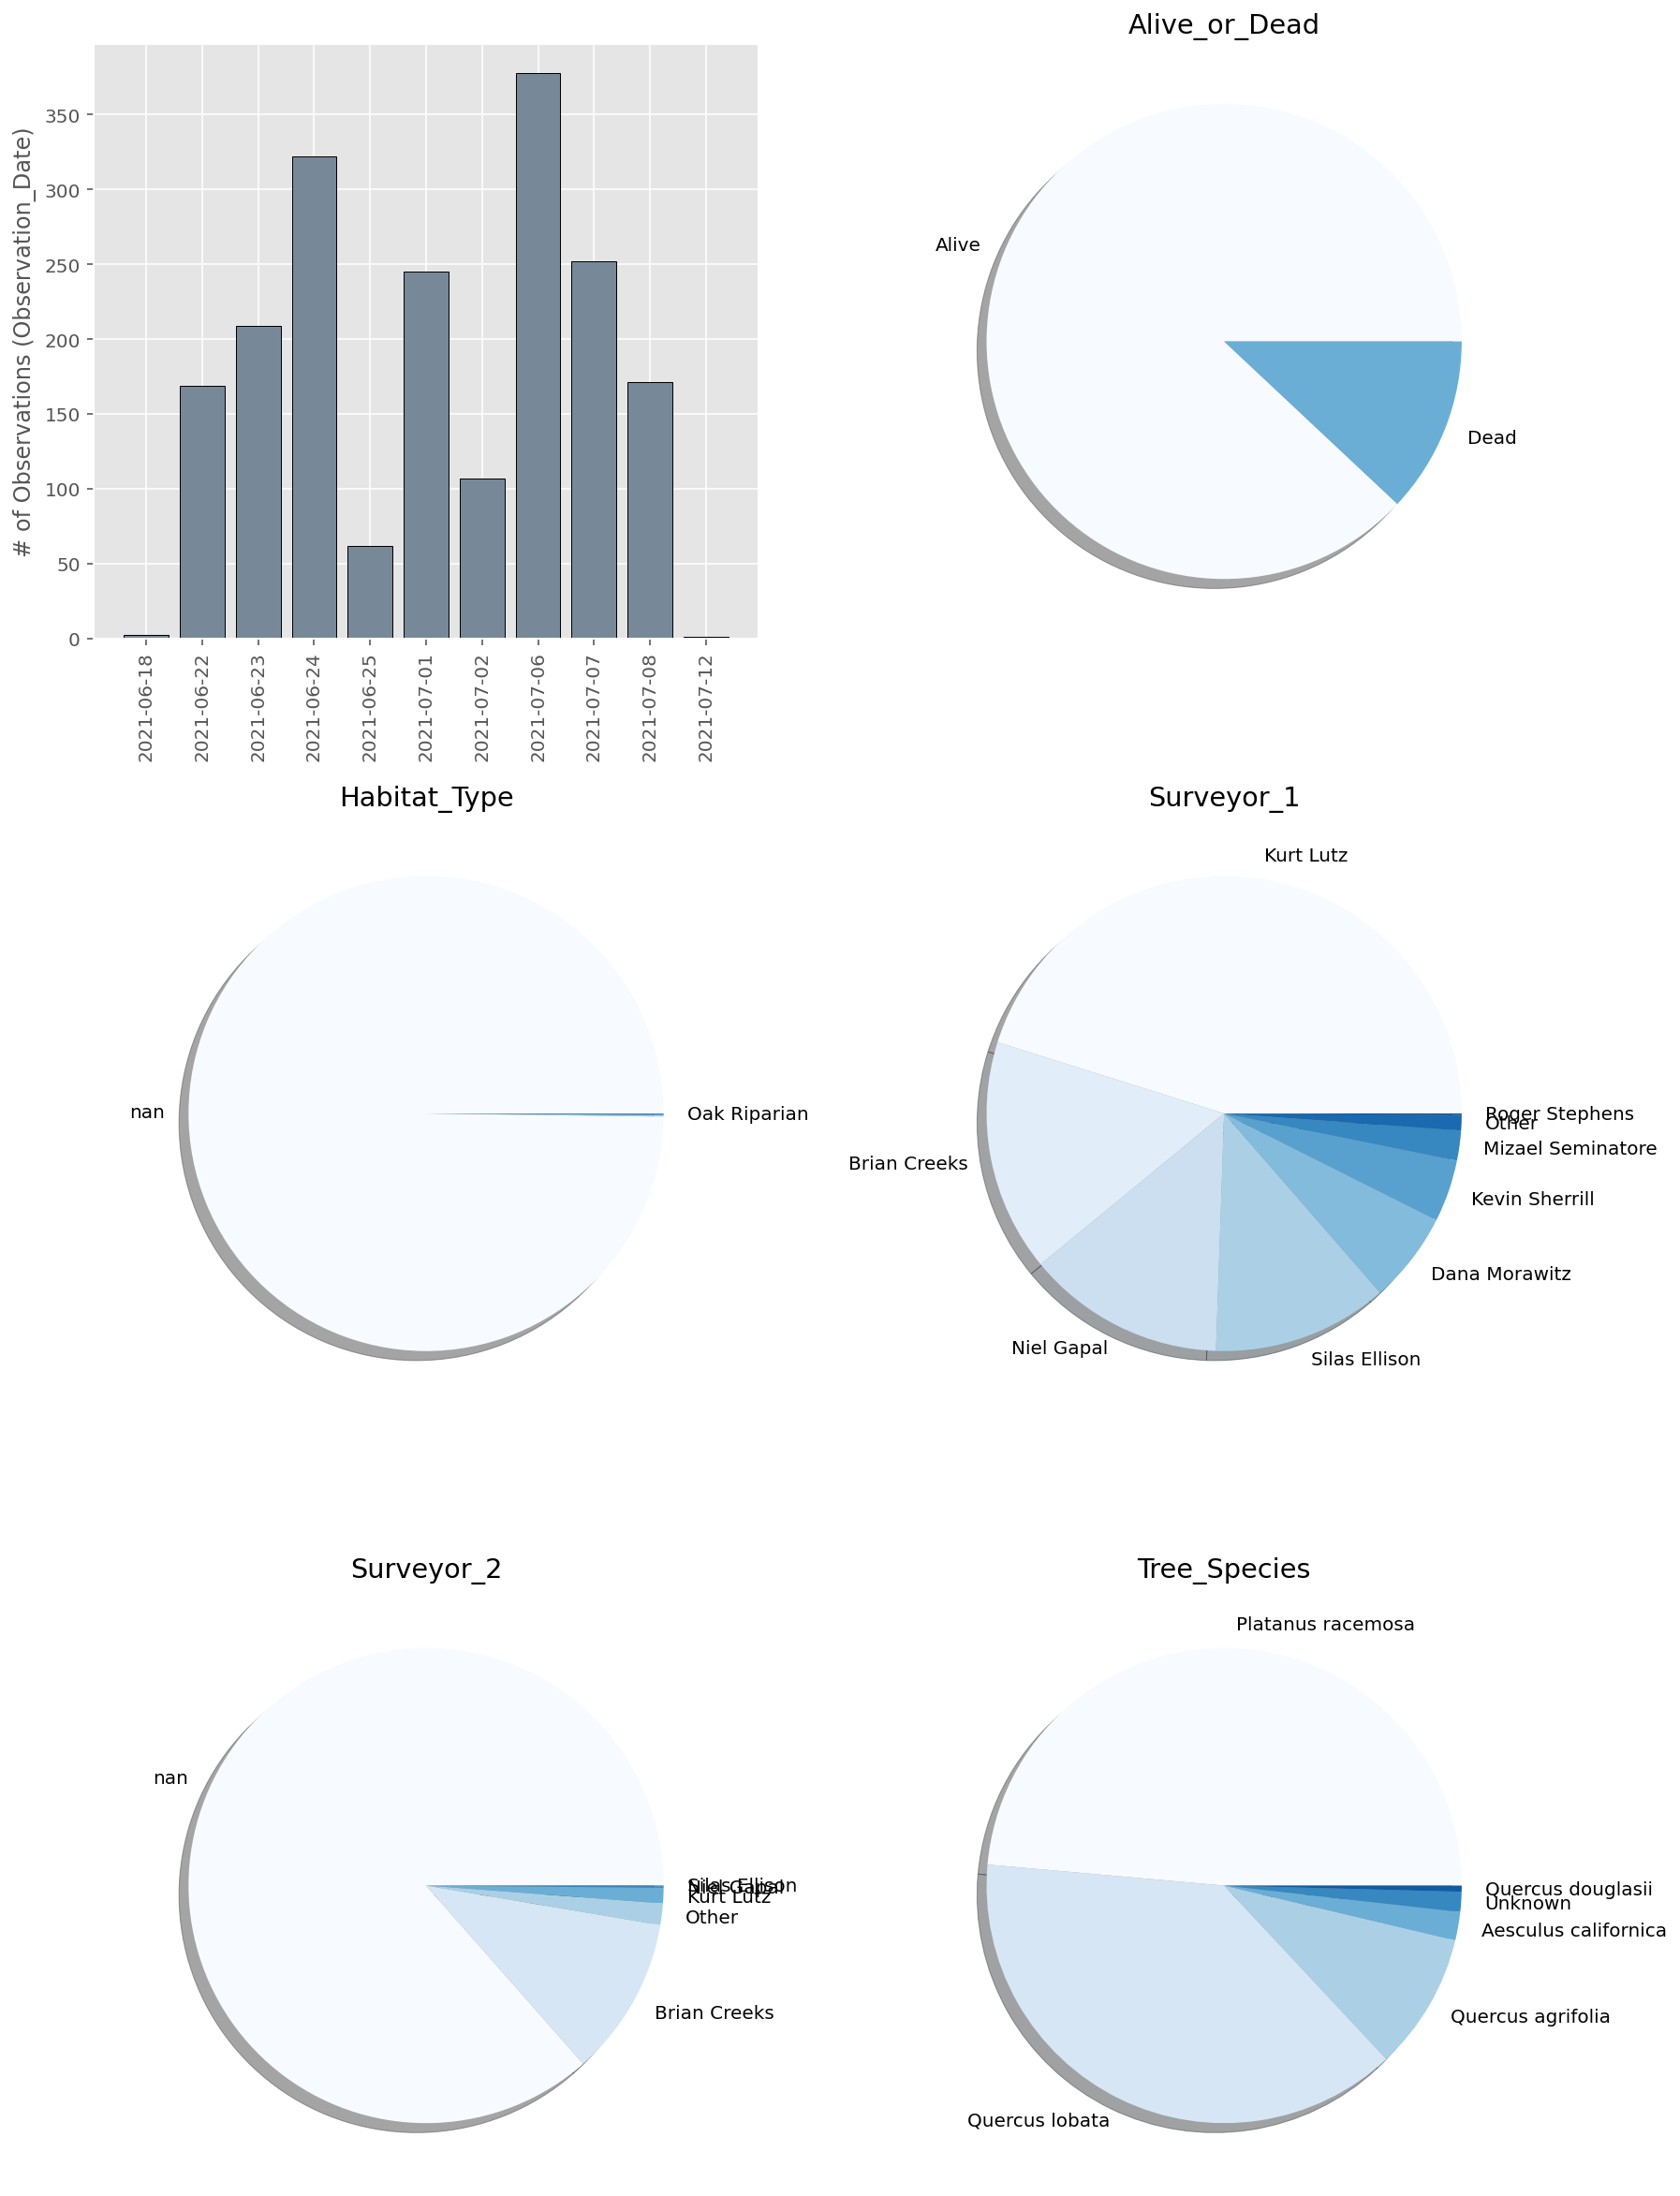

In [14]:
QAQC_plot(sub,['Observation_Date','Alive_or_Dead','Habitat_Type','Surveyor_1','Surveyor_2', 'Tree_Species'])

In [15]:
QAQC_gps(sub,1)

GPS spatial error is above threshold in records below:


,OBJECTID,Observation_Date,Surveyor_1,Surveyor_2,Zone,Habitat_Type,Tree_Species,Alive_or_Dead,GlobalID,Comments,ESRIGNSS_RECEIVER,ESRIGNSS_H_RMS,ESRIGNSS_AVG_H_RMS,Alive_Dead,SurveyYear,SHAPE
5609,6121,2021-06-22 18:52:03,Kurt Lutz,None,NaN,None,Platanus racemosa,Dead,dcf6ae29-8fdb-4da8-b630-7765595a42ef,Not previously mapped.,GNSS:84087,NaN,1.068954,NaN,2020-2021,"{""x"": 6189400.972186653, ""y"": 2037846.9279663735, ""spatialReferenc..."
5636,6148,2021-06-22 19:19:45,Kurt Lutz,None,NaN,None,Platanus racemosa,Alive,7f915a7e-4482-42f4-a739-a00db21158ee,None,GNSS:84087,NaN,1.591290,NaN,2020-2021,"{""x"": 6189115.945198827, ""y"": 2038057.411523102, ""spatialReference..."
5742,6254,2021-06-23 17:23:09,Kurt Lutz,None,NaN,None,Platanus racemosa,Alive,10df15e3-c226-410e-b0d4-b0ec23c33f49,None,GNSS:84087,NaN,1.069602,NaN,2020-2021,"{""x"": 6188633.240564518, ""y"": 2038156.5729547893, ""spatialReferenc..."
5746,6258,2021-06-23 17:30:32,Kurt Lutz,None,NaN,None,Platanus racemosa,Alive,8d191902-c046-4340-8d96-a311aad868f1,"Regrowth, original tree dead.",GNSS:84087,NaN,1.243767,NaN,2020-2021,"{""x"": 6188579.381963694, ""y"": 2038036.4391431462, ""spatialReferenc..."
5747,6259,2021-06-23 17:32:43,Kurt Lutz,None,NaN,None,Platanus racemosa,Alive,d913ba6f-d4e3-4b49-9f48-9027715c83ba,None,GNSS:84087,NaN,1.427861,NaN,2020-2021,"{""x"": 6188624.286884323, ""y"": 2038128.2684523794, ""spatialReferenc..."
5748,6260,2021-06-23 17:33:48,Kurt Lutz,None,NaN,None,Platanus racemosa,Alive,4bb02e1d-d5a0-46e6-b191-a022e467171e,None,GNSS:84087,NaN,1.146570,NaN,2020-2021,"{""x"": 6188599.817914662, ""y"": 2038180.2101589367, ""spatialReferenc..."
5757,6269,2021-06-23 17:49:28,Kurt Lutz,None,NaN,None,Platanus racemosa,Dead,a61621ab-a844-40c2-a2ef-6516556cbbc6,None,GNSS:84087,NaN,1.175190,NaN,2020-2021,"{""x"": 6188577.026258232, ""y"": 2038223.315417308, ""spatialReference..."
5759,6271,2021-06-23 17:51:51,Kurt Lutz,None,NaN,None,Platanus racemosa,Alive,518f2259-6a8b-4cf0-a813-fb5ce03339e7,None,GNSS:84087,NaN,1.035439,NaN,2020-2021,"{""x"": 6188565.859087607, ""y"": 2038167.6584790226, ""spatialReferenc..."
5762,6274,2021-06-23 17:54:23,Kurt Lutz,None,NaN,None,Platanus racemosa,Alive,ffb9921b-cb2e-4456-8f44-ddd246edb91b,None,GNSS:84087,NaN,1.035285,NaN,2020-2021,"{""x"": 6188571.303924881, ""y"": 2038103.6938906522, ""spatialReferenc..."
5765,6277,2021-06-23 17:56:51,Kurt Lutz,None,NaN,None,Platanus racemosa,Dead,21839b4a-5372-4b97-8d9f-eae81085d8c8,None,GNSS:84087,NaN,1.016153,NaN,2020-2021,"{""x"": 6188548.886717889, ""y"": 2038076.4357584359, ""spatialReferenc..."


# Results

In [16]:
#Set values
trees_planted = get_constants('trees_planted_count')
habitat_area = get_constants('habitat_area')
initial_planting_density = get_constants('initial_planting_density')

In [17]:
############ RESULTS A

#Total trees detected (alive or dead)
trees_detected = sub.groupby(['Habitat_Type']).Alive_or_Dead.count()
print("Total Trees Detected (alive or dead count):\n", trees_detected.to_string())

#Detection Rate
detection_rate = trees_detected / trees_planted
print("\n\nDetection Rate (%):\n", (detection_rate*100).round(1).to_string())

#Count of alive trees
aliveSub = sub.loc[sub.Alive_or_Dead == 'Alive',:]
alive_count = aliveSub.groupby(['Habitat_Type']).Alive_or_Dead.count()
print('\n\nAlive Trees Detected (count):\n', alive_count.to_string())

#Observed planting density
obs_planting_density = trees_detected / habitat_area
print('\n\nObserved Planting Density (Trees/Acre):\n', obs_planting_density.round(1).to_string())

#Tree survival
tree_survival = alive_count / trees_planted
print('\n\nTree Survival (%):\n', (tree_survival*100).round(1).to_string())

Total Trees Detected (alive or dead count):
 Habitat_Type
                2
Oak Riparian    2


Detection Rate (%):
                      NaN
Oak Riparian         0.1
Oak Savannah         NaN
Oak Woodland         NaN
Sycamore Riparian    NaN


Alive Trees Detected (count):
 Habitat_Type
                1
Oak Riparian    1


Observed Planting Density (Trees/Acre):
                      NaN
Oak Riparian         0.3
Oak Savannah         NaN
Oak Woodland         NaN
Sycamore Riparian    NaN


Tree Survival (%):
                      NaN
Oak Riparian         0.1
Oak Savannah         NaN
Oak Woodland         NaN
Sycamore Riparian    NaN


In [18]:
####### Results B
rB = pd.DataFrame(sub.groupby(['Habitat_Type','Tree_Species']).Alive_or_Dead.value_counts())
rB.columns = ['Count']
rB.sort_index()

Count
Habitat_Type Tree_Species         Alive_or_Dead       
             Aesculus californica Dead               1
             Platanus racemosa    Alive              1
Oak Riparian Aesculus californica Dead               1
             Quercus lobata       Alive              1

# Level of effort analysis

In [19]:
data['Date']= data.Observation_Date.dt.strftime('%Y-%m-%d')

In [20]:
surveyors_by_day = data.groupby(['Habitat_Type','Date']).Surveyor_1.nunique()
surveyors_by_day

Habitat_Type       Date      
                   2021-06-18    1
Oak Riparian       2019-07-10    2
                   2019-07-11    2
                   2019-07-16    2
                   2019-07-17    2
                   2019-07-23    1
                   2019-07-25    1
                   2019-07-26    1
                   2019-07-30    1
                   2019-07-31    1
                   2019-08-01    1
                   2019-08-02    1
                   2021-07-01    1
                   2021-07-07    1
Sycamore Riparian  1899-12-30    1
                   2019-05-24    1
                   2019-06-06    1
                   2019-06-07    2
                   2019-07-03    1
                   2019-07-04    1
                   2019-07-10    1
                   2019-07-11    2
                   2019-07-12    1
                   2019-07-15    2
                   2019-07-16    2
Name: Surveyor_1, dtype: int64

In [21]:
#effort of original census
surveyor_days = surveyors_by_day.groupby('Habitat_Type').sum()
surveyor_days

Habitat_Type
                      1
Oak Riparian         17
Sycamore Riparian    15
Name: Surveyor_1, dtype: int64

In [22]:
#effort of original census, Hours required to survey OR or SR for all alive/dead trees, parrallel transect search pattern.
surveyor_hrs = surveyor_days * 8
surveyor_hrs

Habitat_Type
                       8
Oak Riparian         136
Sycamore Riparian    120
Name: Surveyor_1, dtype: int64

In [23]:
# % Alive out of trees found
alive_pct = alive_count / trees_detected 
alive_pct

Habitat_Type
                0.5
Oak Riparian    0.5
Name: Alive_or_Dead, dtype: float64

In [24]:
#Estimated surveyor hours corrected for not recording info on dead trees
high_estimate_hrs = surveyor_hrs * alive_pct
high_estimate_hrs / 8

Habitat_Type
                     0.5
Oak Riparian         8.5
Sycamore Riparian    NaN
dtype: float64

In [25]:
#Estiamted surveyor hours corrected for not recording info on dead trees and switching to point-to-point search method
low_estimate_hrs = high_estimate_hrs * .5
low_estimate_hrs /8

Habitat_Type
                     0.25
Oak Riparian         4.25
Sycamore Riparian     NaN
dtype: float64

# Export Data Deliverable

In [7]:
data.columns

Index(['OBJECTID', 'Observation_Date', 'Surveyor_1', 'Surveyor_2', 'Zone',
       'Habitat_Type', 'Tree_Species', 'Alive_or_Dead', 'GlobalID', 'Comments',
       'ESRIGNSS_RECEIVER', 'ESRIGNSS_H_RMS', 'ESRIGNSS_AVG_H_RMS',
       'Alive_Dead', 'SurveyYear', 'SHAPE'],
      dtype='object')

In [9]:
# drop and rename columns
data = data.drop(columns=['Alive_Dead','SurveyYear'])
data = data.rename(columns={'OBJECTID':'Object ID','GlobalID':'Global ID'})

In [10]:
field_order = [
    'Observation_Date',
    'Surveyor_1',
    'Surveyor_2',
    'Zone',
    'Habitat_Type',
    'Tree_Species',
    'Alive_or_Dead',
    'ESRIGNSS_RECEIVER',
    'ESRIGNSS_H_RMS',
    'ESRIGNSS_AVG_H_RMS',
    'Comments',
    'Object ID',
    'Global ID',
    'SHAPE'
]

In [11]:
export_data_deliverable(data, feature_service, field_order, file_name='Riparian_Tree_Census')

No Related Table Found


Exported to Outputs/Riparian_Tree_Census_Data_20211029.xlsx
